<center><h1>TRANSCRIBING AN AUDIO FILE</h1></center>



<center><h1>Reference python codes in Jupyter using  OpenAi's  Speech to Text model (Whisper-1)</h1></center>

__<center>By : Nael Jean-Baptiste (aka Analyze-It)</center>__

<center>`***********************************************************************************************************`</center>

This guide is all about teaching you how to convert spoken words into written text. We'll be using  OpenAI's technology (Speech to Text engine- StT engine) to understand the spoken words. We will be using Python programming language to call the audio and convert it into a text via the StT engine. The pyton codes will be run into Jupyter Notebook.  This is more about showing you the steps rather than teaching you coding in python. We'll start by turning one audio recording into text and then show you how to do this with many recordings at the same time. In the end, we'll put all the written text together into one big piece. Think of this as a handy guide to use whenever you need to turn speech into text using OpenAI's tools and with a bit of Python knowledge.

The first thing you need to do is to import the open openai module and call your API in the notebook. 

Before importing the openai module  in your notebook,it must be alreaady installed into your computer via command prompt shell. If you have a window enviorment in your computer, go to the search and type cmd. Once your command prompt is opened,  type : "pip install openai" and press enter key. See illustration below.

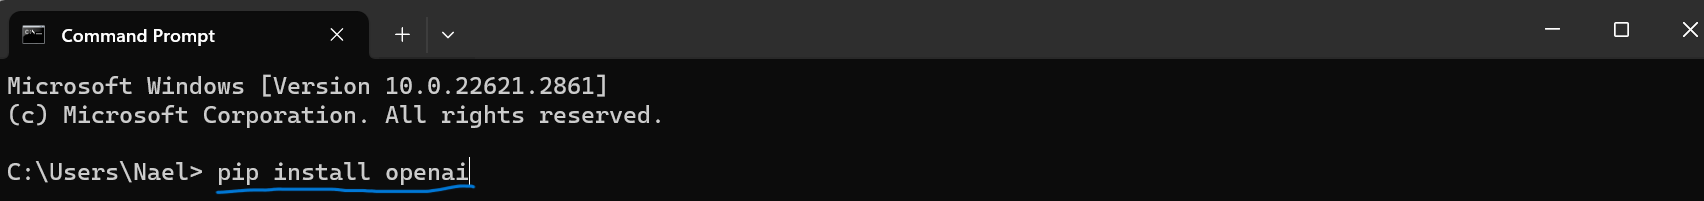

The line of code below is the Python statement that imports the openai module. This allows you to use the functionality provided by the openai package in your code. 

In [1]:
# Importing the OpenAI module 
import openai

Then, provide the API key that is associated with your openai account. This  will be  used to authenticate and authorize access to an API (Application Programming Interface). APIs are sets of rules and protocols that allow different software applications to communicate with each other. In that case, it is between Python and OpenAI speech to text engine.  

<font color="red">&#9888; Be careful!</font>
: Don't share your API key. It should be kept confidential to prevent unauthorized usage.


In [2]:
# Call your openAI API key
key = "your_key_here"
openai.api_key = key

To get an OpenAI API key you need to create an OpenAI Account. Visit the OpenAI website and sign up for an account if you don't already have one. Once logged in, navigate to the API section. This is typically found in your account dashboard or under a dedicated API section on the website. Click on "Create a new secret key".  Copy and save it because once you go back into you account, it will not anymore be displayed. 

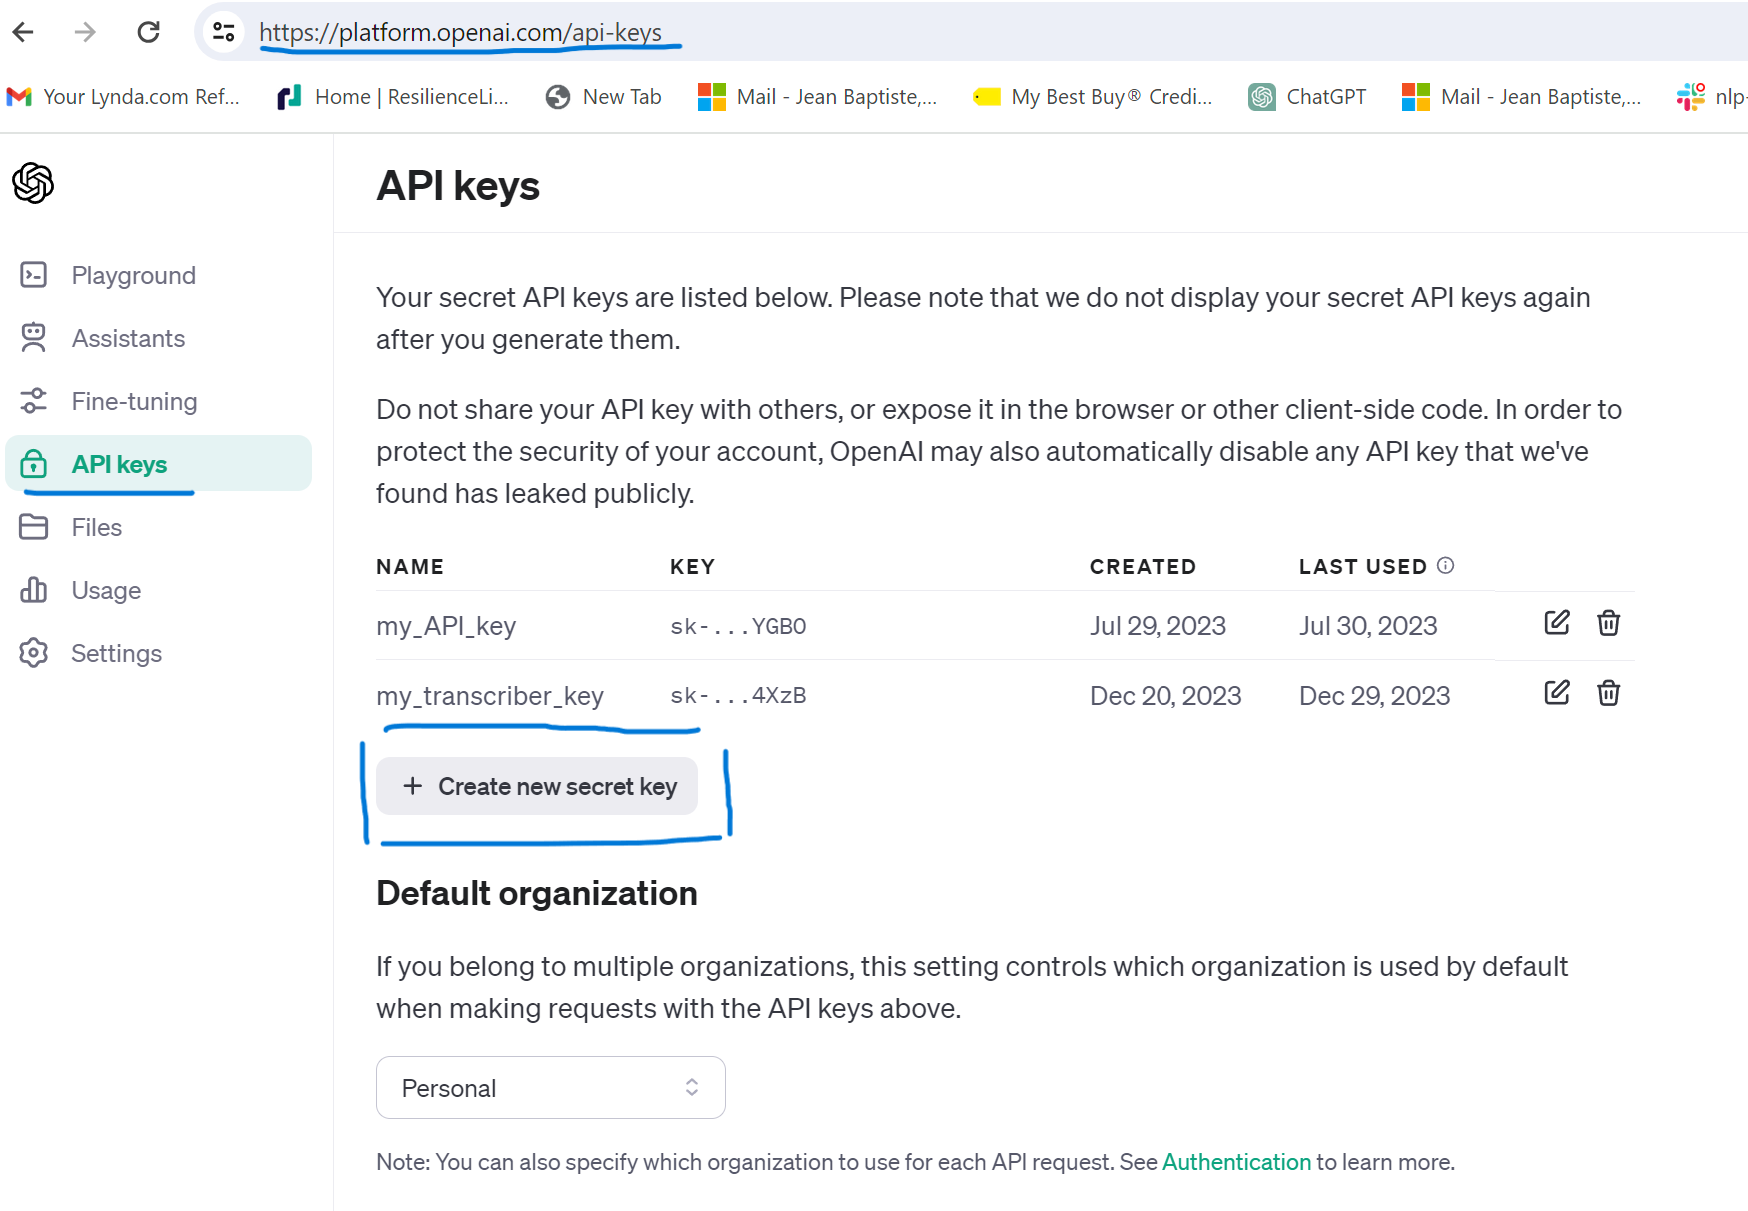

## Reading and transcribing a single audio file 

Once you have imported the openai module and provided the api key, you should provide the path where your audio is located or stored. In this example, I have an audio file named "yann" in the format of an mp3 and it  is located in my desktop. As of today (December 2023), openai's TtS model (Whisper-1) can process audio file in the format of mp3, mp4, mpeg, mpga, m4a, wav, and webm.

By default, the Whisper API only supports files that are less than 25 MB. If you have an audio file that is longer than that, you will need to break it up into chunks of 25 MB's or less or used a compressed audio format. To get the best performance, avoid breaking the audio up mid-sentence as this may cause some context to be lost.

In [3]:
# create a variable that provides the path of your audio file 
audio_path = "C:/Users/Nael/Desktop/yann.mp3"

Now let's reads the audio file, sends it to the OpenAI API for transcription using language model ("whisper-1"). And then, we will print the resulting transcription to the console. In the codes we also ensure that if any errors occur during this process, they are caught and an error messages is displayed. Here is a break down of each steps for the next block of codes: 

__Try-Except Block__:The code is enclosed within a try and except block. This is a common structure used in Python for handling exceptions (errors). It means that the code within the try block will be executed, and if any exceptions (errors) occur during execution, they will be caught and handled in the except block. This structure helps prevent the script from crashing due to errors and allows for graceful error handling.


__Opening the Audio File__: In the with statement, the code opens an audio file specified by the audio_path variable in binary read mode ("rb"). The with statement is used to ensure that the file is properly closed after it's done being used. This is a good practice to avoid resource leaks.


__Transcribing the Audio File__: Inside the with block, the code calls the OpenAI API to transcribe the audio file. Here are the details of the parameters used:
    
> _model_: Specifies the language model to be used for transcription. In this case, it's set to "whisper-1," which is a specific model trained for transcription.

> _file_: Specifies the audio file to be transcribed. The audio_file variable contains the opened audio file.

> _response_format_: Specifies the format in which you want the transcription response. Here, it's set to "text," which means you want the transcription as plain text.

> _language_: Specifies the language of the audio content. It's set to "en," indicating English language content.


__Storing the Transcription__: The result of the transcription is stored in the transcript variable.


__Printing the Transcript__:After transcribing the audio, the script prints the transcript to the console using print(transcript).


__Exception Handling__:If any exceptions (errors) occur during the execution of the try block, they will be caught in the except block. The exception object is assigned to the variable e, and the code prints an error message indicating that an error occurred along with the details of the error (e.g., the error message).



In [4]:
try:
    # Open the audio file
    
    with open(audio_path, "rb") as audio_file:
        
        # Transcribe the audio file
        transcript = openai.Audio.transcribe(
            model="whisper-1",
            file=audio_file,
            response_format="text",
            language="en"
        )
    # Print the transcript
    
    print(transcript)
    
except Exception as e:
    print("An error occurred:", e)

What is your name? My name is Yan-Nile Jabatis. How old are you? I'm 19 years old. What are you doing right now? I'm currently enrolled in college studying to become a computer science major. What you would like to do in the future? I would want to learn cyber security. And what? And learn how to code, program and just software development. Alright, thank you.



## Reading and transcribing multiple  audio files simultenaously 

To transcribe multiple audio files simultenaously, you can creat a script that will iterate over a list of audio file paths, transcribes each file into text using OpenAI's transcription service, and stores each resulting transcription in a dictionary with a distinct key. This will allow for easy access and management of the transcribed texts.

First you create a variable 'audio_paths' which  is a list containing the file paths of the audio files you want to transcribe. In this example, there are two file paths pointing to .mp3 files on my desktop.

In [5]:
# List of paths to your audio files
audio_paths = [
    "C:/Users/Nael/Desktop/yann.mp3",
    "C:/Users/Nael/Desktop/yann1.mp3"
    # Add more paths as needed
]

Create a function that will contain the codes used to transcribe a single audio file (as we did above). In our example below, it is named  'transcribe_audio' and it will be called while iterating over each audio file path. 

In [6]:
# Function to transcribe a single audio file
def transcribe_audio(file_path):
    try:
        with open(file_path, "rb") as audio_file:
            transcript = openai.Audio.transcribe(
                model="whisper-1",
                file=audio_file,
                response_format="text",
                language="en"
            )
        return transcript
    except Exception as e:
        print(f"An error occurred while transcribing {file_path}: {e}")
        return None

Create a variable transcriptions which is a dictionary that will store the transcriptions. Each transcription will be stored with a unique key so that it can be easily referenced later.

In [7]:
# Dictionary to store each transcription with a distinct name
transcriptions = {}

Now that you have created  a list that contain the path for your audios and you have created a function that can transcribe an audio file, you will itterate over each audio file, transcribe it, and store the result in the dictionary.

Here is a break down explaination of each steps and/or codes used:

* The 'for' loop iterates over each audio file path in the 'audio_paths' list.


* 'enumerate(audio_paths)' provides both the index ('i') and the path ('path') of each audio file in the list.


* variable_name = f"transcription_{i}": For each audio file, a unique variable name is created to store its transcription. The name is formed by combining the word "transcription" with the index of the file in the list ('i').


* The script then prints a message indicating it's transcribing the current file.


* transcription = transcribe_audio(path): The transcribe_audio function is called with the current audio file path, and the returned transcription is stored in 'transcription'.


* If the transcription is successful (not 'None'), it is added to the transcriptions dictionary with the unique key created earlier ('variable_name').



* A message is printed to indicate that the transcript for the current file has been stored successfully in the dictionary with the specific 'variable_name'.


In [8]:
# Iterate over each audio file, transcribe it, and store the result in the dictionary
for i, path in enumerate(audio_paths):
    variable_name = f"transcription_{i}"
    print(f"Transcribing: {path}")
    transcription = transcribe_audio(path)
    if transcription:
        transcriptions[variable_name] = transcription
        print(f"Transcript for {path} stored in variable '{variable_name}'")

Transcribing: C:/Users/Nael/Desktop/yann.mp3
Transcript for C:/Users/Nael/Desktop/yann.mp3 stored in variable 'transcription_0'
Transcribing: C:/Users/Nael/Desktop/yann1.mp3
Transcript for C:/Users/Nael/Desktop/yann1.mp3 stored in variable 'transcription_1'


Now you can access each transcription by its variable name from the dictionary.  For example, the code below will print the transcription of the second file. 

In [9]:
print(transcriptions["transcription_1"])  

What is your name? My name is Niall Jean-Baptiste. How old are you? I am 53 years old. What are you doing right now? I'm currently working for an INGOs. What would you like to do in the future? In the future I would like to learn more about artificial intelligence and programming. And what? I also would like to develop some software to help monitoring and evaluation. All right, thank you very much for your interview.



Alternatively,  for each  audio transcripted, you can recreate a variable that store your audio transcript in format of a string that you can reference for preprocessig and for applying in-depth NLP algorithm. 

For example, in the codes below we will concatenate each trancription into a single variable.The result will be a string variable on which you can perform preprocessing and apply Natural Language Processing alogrithm for analyzing the text. 

In [10]:
audio1 = transcriptions["transcription_0"]
audio2 = transcriptions["transcription_1"] 

In [12]:
audio1_2 = audio1 + audio2
audio1_2

"What is your name? My name is Yan-Nile Jabatis. How old are you? I'm 19 years old. What are you doing right now? I'm currently enrolled in college studying to become a computer science major. What you would like to do in the future? I would want to learn cyber security. And what? And learn how to code, program and just software development. Alright, thank you.\nWhat is your name? My name is Niall Jean-Baptiste. How old are you? I am 53 years old. What are you doing right now? I'm currently working for an INGOs. What would you like to do in the future? In the future I would like to learn more about artificial intelligence and programming. And what? I also would like to develop some software to help monitoring and evaluation. All right, thank you very much for your interview.\n"